In [101]:
# Question One 

import numpy as np 
import scipy
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from scipy.optimize import root_scalar

def blackScholesModel(S, K, r, sigma, Tmt):

    # Inputs for Black-Scholes Equation
    d1 = ((np.log(S/K) + r*np.sqrt(Tmt))/ sigma*np.sqrt(Tmt)) + 0.5*sigma*np.sqrt(Tmt)
    d2 = sigma*np.sqrt(Tmt)

    # Black-Scholes Equation
    c = S*scipy.stats.norm.cdf(d1) + np.exp(-r*Tmt)*scipy.stats.norm.cdf(d2)

    # Derivative of Black-Scholes w.r.t volatility
    deriv = S* scipy.stats.norm.pdf(d1) * np.sqrt(Tmt)


    return c, deriv

def blackScholes_value(sigma, K):
    f, deriv = blackScholesModel(S, K, r, sigma, Tmt)
    return f 


# Inputs for Black-Scholes Model
S = 34.81 
r = 0.025 
t0 = date.fromisoformat('2014-08-27')
tn = date.fromisoformat('2014-09-25')

Tmt = (tn - t0).days / 365

K = [33.5, 34, 34.5, 35, 35.5, 36]
Y = [1.46, 1.040, 0.640, 0.370, 9.155, 0.070]

siglo = finfo(float64).eps
sighi = 1.0
sig = [siglo, sighi]

# Iterate over all data stirck and calls
for k, Kj in enumerate(K):
    # function for where sigma is variable unknown
    # making function = 0, f = Call_Value(BS model) - Market_Call_price
    fj = lambda sigma: blackScholes_value(sigma, Kj) - Y[k]
    
    # Finding Implied Volatility 
    soln = root_scalar(fj, bracket=sigint, method='brentq')
    implied_volatility = soln.root
    
    print(f"strike:{Kj}    Market Call: {Y[k]}   NumberOfIterations: {soln.iterations}    Implied Volatility:{implied_volatility}")


    


ValueError: f(a) and f(b) must have different signs

0.12900551839676616
0.12386073876285313
0.10896122661143971
0.10904588132362625
0.09844136079022982
0.1021118554043075


<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:85: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_85712/3042353727.py:85: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$')
/var/folders/0m/tjm8n82117bg4plwvf105j2h0000gn/T/ipykernel_85712/3042353727.py:58: RuntimeWarning: divide by zero encountered in divide
  d1 = ( log(S/K) + ( r + sigma**2/2) * Tmt ) / s


Text(0, 0.5, 'Implied Volatility')

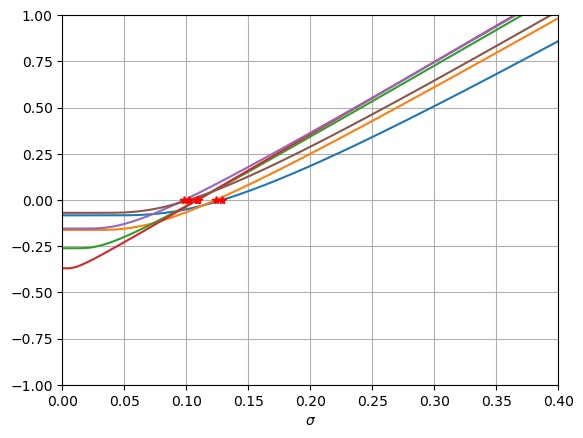

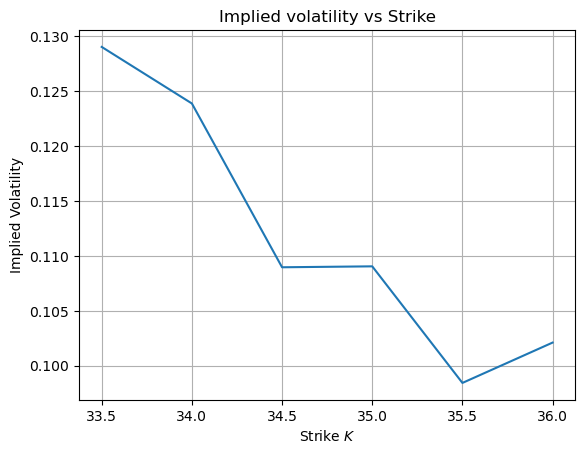

In [105]:
# MATH3311/MATH5335: ex07q1sol.m
# Exercises 7, Question 1 solution

from numpy import linspace, array, float64, finfo, zeros_like, empty
from datetime import date
from blackscholes import blackscholes
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
    
# Recent NAB example
# Current asset price
S = 34.810
# Risk free interest rate
r = 0.025
# Vector of strikes
K = [33.5, 34, 34.5, 35, 35.5, 36]
# Corresponding vector of call prices
cmkt = [1.460, 1.040, 0.640, 0.370, 0.155, 0.070]
# Dates: today and expiry
t0 = date.fromisoformat('2014-08-27')
tf = date.fromisoformat('2014-09-25')

# Convert to years using 365 day basis
# datenum converts dates to number of days from specific date in past
Tmt = (tf-t0).days / 365

# Solve for implied volatility

# Implied volatility should be in sigint = [siglo, sighi]
siglo = finfo(float64).eps
sighi = 1.0
sigint = [siglo, sighi]

# Vector of sigma values for plotting
SIG = linspace(0, sighi, 401)
f_values = empty((len(K), len(SIG)))

# Loop over all strikes and solve for implied volatility
IV = zeros_like(K)

def blackscholes(S, K, r, sigma, Tmt):
    """
    Black-Scholes formula for the value of a call option.

    Also returns the rate of change of the option value with respect 
    to the volatility sigma.  
    Input arguments:

    S   = underlying asset price
    K   = strike price
    r   = risk-free interest rate
    Tmt = time to maturity = T - t where T = expiry

    If sigma is a vector of volatilities, then both the
    call value and its derivatives are vectors of the same size."""

    s = sigma * sqrt(Tmt)
    d1 = ( log(S/K) + ( r + sigma**2/2) * Tmt ) / s
    d2 = d1 -  s

    c = S * norm.cdf(d1) - K * exp(-r*Tmt) * norm.cdf(d2)
    # Derivative of call vlaue w.r.t. volatility sigma
    dcds = S * norm.pdf(d1) * sqrt(Tmt)

    return c, dcds

def blackscholes_value(sigma, K):
    c, dcds = blackscholes(S, K, r, sigma, Tmt)
    return c

for j, Kj in enumerate(K):
    fj = lambda sigma: blackscholes_value(sigma, Kj) - cmkt[j]
    
    soln = root_scalar(fj, bracket=sigint, method='brentq')
    print(soln.root)
    IV[j] = soln.root
    f_values[j,:] = fj(SIG)                 


# Use a plot to check calculation
plt.figure(1)
plt.plot(SIG, f_values.T, IV, zeros_like(IV), 'r*')
plt.axis((0.0, 0.4, -1.0, 1.0))
plt.grid(True)
plt.xlabel('$\sigma$')

# Plot implied volatility against strike
# In a Black-Scholes world the volatility should be constant, so should not change with changing strike
plt.figure(2)
plt.plot(K, IV)
plt.grid(True)
plt.title('Implied volatility vs Strike')
plt.xlabel('Strike $K$')
plt.ylabel('Implied Volatility')

In [93]:
# Question One 

import numpy as np 
import scipy
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

def blackScholesModel(S, K, r, Tmt, sigma):

    # Inputs for Black-Scholes Equation
    d1 = ((np.log(S/K) + r*np.sqrt(Tmt))/ sigma*np.sqrt(Tmt)) + 0.5*sigma*np.sqrt(Tmt)
    d2 = sigma*np.sqrt(Tmt)

    # Black-Scholes Equation
    c = S*scipy.stats.norm.cdf(d1) + np.exp(-r*Tmt)*scipy.stats.norm.cdf(d2)

    # Derivative of Black-Scholes w.r.t volatility
    deriv = S* scipy.stats.norm.pdf(d1) * np.sqrt(Tmt)


    return c, deriv

def blackScholes_value(sigma, K):
    f, deriv = blackScholesModel(S, K, r, Tmt, sigma)
    return f 


# Inputs for Black-Scholes Model
S = 34.81 
r = 0.025 
t0 = date.fromisoformat('2014-08-27')
tn = date.fromisoformat('2014-09-25')

Tmt = (tn - t0).days / 365

X = [33.5, 34, 34.5, 35, 35.5, 36]
Y = [1.46, 1.040, 0.640, 0.370, 9.155, 0.070]

siglo = finfo(float64).eps
sighi = 1.0
sigint = [siglo, sighi]

# Iterate over all data stirck and calls
for k, Kj in enumerate(X):
    # function for where sigma is variable unknown
    # making function = 0, f = Call_Value(BS model) - Market_Call_price
    fj = lambda sigma: blackScholes_value(sigma, Kj) - Y[k]
    
    # Finding Implied Volatility 
    soln = scipy.optimize.root_scalar(fj, bracket=sigint, method='brentq')
    implied_volatility = soln.root
    
    print(f"strike:{Kj}    Market Call: {Y[k]}   NumberOfIterations: {soln.iterations}    Implied Volatility:{implied_volatility}")


    

ValueError: f(a) and f(b) must have different signs